# Import Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the MovieLens Dataset

In [2]:
# Load the Movie Lens dataset from kaggle downloaded
try:
    tags = pd.read_csv("tag.csv")
    ratings = pd.read_csv("rating.csv")
    movies = pd.read_csv("movie.csv")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure all required files are present.")
    exit(1)

# EDA

In [4]:
# Explore and understand the data from the movielens dataset
print("==== Tags ====")
print(tags.head())
print("==== Ratings ====")
print(ratings.head())
print("==== Movies ====")
print(movies.head())

==== Tags ====
   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18
==== Ratings ====
   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
==== Movies ====
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                               

In [5]:
# Display basic information about the dataset
print("Dataset Information:")
print(movies.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB
None


In [6]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(movies.isnull().sum())


Missing Values:
movieId    0
title      0
genres     0
dtype: int64


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(movies.describe())


Summary Statistics:
             movieId
count   27278.000000
mean    59855.480570
std     44429.314697
min         1.000000
25%      6931.250000
50%     68068.000000
75%    100293.250000
max    131262.000000


In [14]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(ratings.isnull().sum())


Missing Values:
userId       0
movieId      0
rating       0
timestamp    0
year         0
dtype: int64


In [13]:
print("\nSummary Statistics:")
print(ratings.describe())


Summary Statistics:
             userId       movieId        rating  \
count  2.000026e+07  2.000026e+07  2.000026e+07   
mean   6.904587e+04  9.041567e+03  3.525529e+00   
min    1.000000e+00  1.000000e+00  5.000000e-01   
25%    3.439500e+04  9.020000e+02  3.000000e+00   
50%    6.914100e+04  2.167000e+03  3.500000e+00   
75%    1.036370e+05  4.770000e+03  4.000000e+00   
max    1.384930e+05  1.312620e+05  5.000000e+00   
std    4.003863e+04  1.978948e+04  1.051989e+00   

                           timestamp          year  
count                       20000263  2.000026e+07  
mean   2004-11-20 02:32:01.677113984  2.004379e+03  
min              1995-01-09 11:46:44  1.995000e+03  
25%              2000-08-20 18:55:45  2.000000e+03  
50%              2004-12-20 15:18:06  2.004000e+03  
75%       2008-11-02 16:11:57.500000  2.008000e+03  
max              2015-03-31 06:40:02  2.015000e+03  
std                              NaN  5.176947e+00  


In [15]:
# Check for missing values in the dataset
print("\nMissing Values:")
print(tags.isnull().sum())


Missing Values:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [16]:
print("\nSummary Statistics:")
print(tags.describe())


Summary Statistics:
              userId        movieId
count  465564.000000  465564.000000
mean    68712.354263   32627.762920
std     41877.674053   36080.241157
min        18.000000       1.000000
25%     28780.000000    2571.000000
50%     70201.000000    7373.000000
75%    107322.000000   62235.000000
max    138472.000000  131258.000000


# Distribution of Movie genres

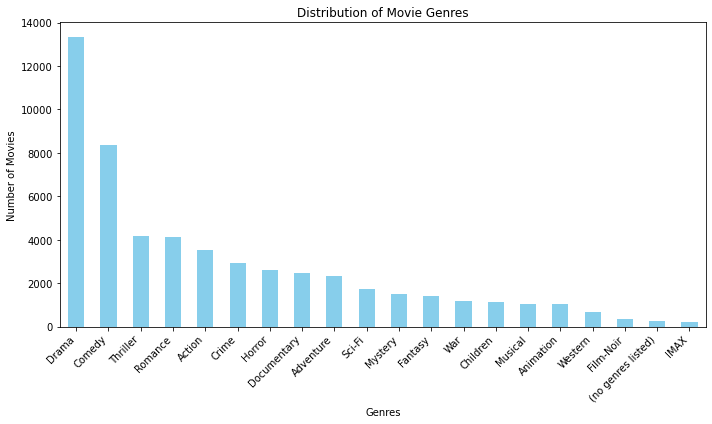

In [8]:
# Plot the distribution of movie genres from the Movielens dataset
plt.figure(figsize=(10, 6))
genres_splits = movies['genres'].str.split('|', expand=True).stack()
genre_counts = genres_splits.value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre_distribution.png')
plt.show()

# Histogram of Movie ratings

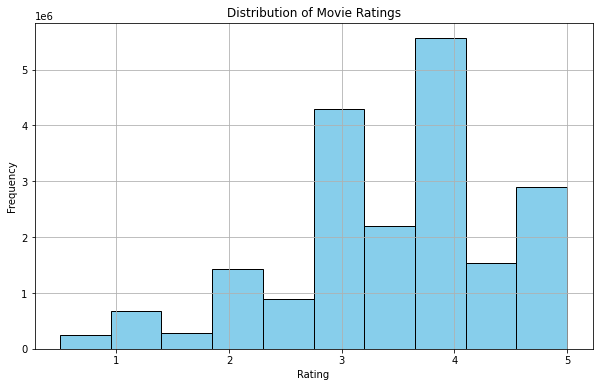

In [9]:
# Plot the histogram of movie ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Movie_Ratings_distribution.png')
plt.show()

# Average Rating of Movies Over Time

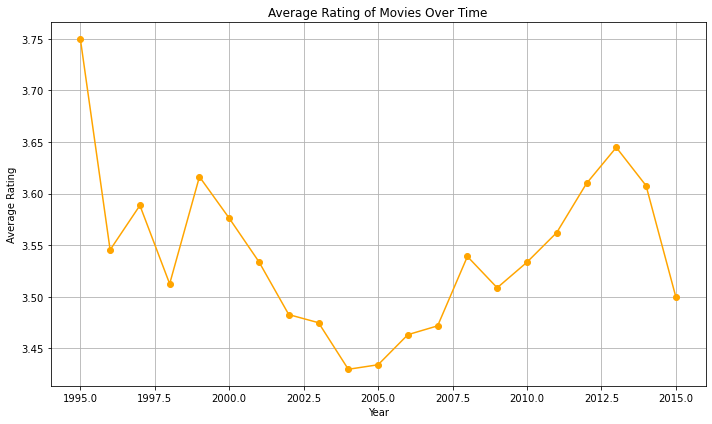

In [10]:
# Convert timestamp data to datetime format to process it
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['year'] = ratings['timestamp'].dt.year

# Plot the average rating of movies over time from the data
average_rating_per_year = ratings.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_rating_per_year.index.values, average_rating_per_year.values, marker='o', color='orange')
plt.title('Average Rating of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.savefig('average_rating_over_time.png')
plt.show()

# Correlation Matrix of Movie Genres

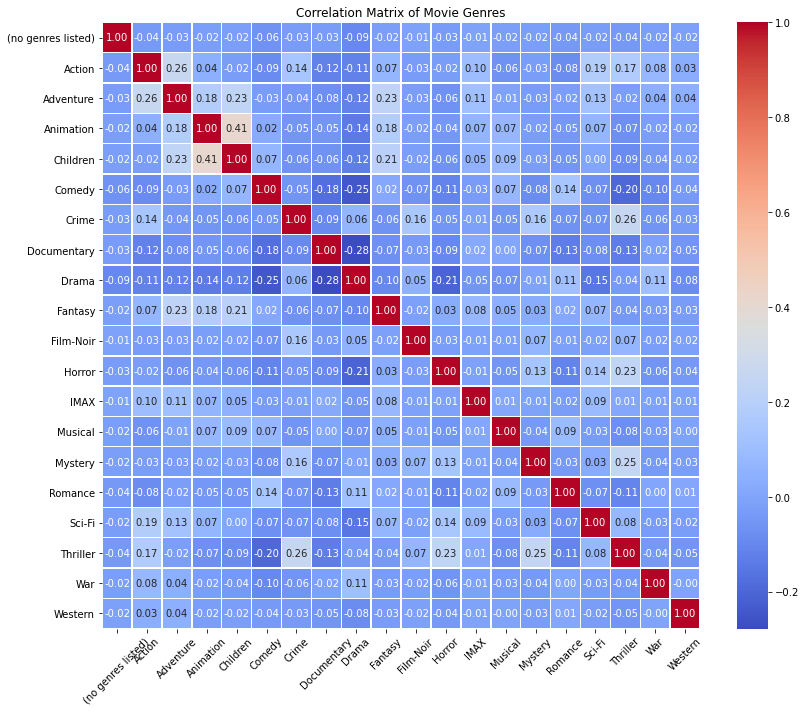

In [11]:
genres_data = movies['genres'].str.get_dummies(sep='|')
genre_corr = genres_data.corr()

# Plot the heatmap of the correlation matrix between the Movie Genres
plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Movie Genres')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.tight_layout() 
plt.savefig('Correlation_Movie_Genres.png', dpi=300)
plt.show()

# Elbow plot

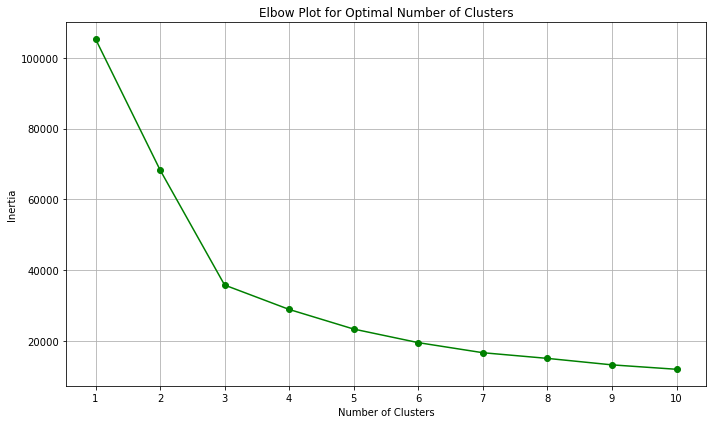

In [12]:
# Prepare data for clustering and Perfroming the Standardisation
scaler = StandardScaler()
genres_data_scaled = scaler.fit_transform(genres_data)

# Apply PCA for reduce dimensionality of the data
pca = PCA(n_components=2)
genres_data_pca = pca.fit_transform(genres_data_scaled)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(genres_data_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot from the above data
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', color='green')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_plot.png')
plt.show()